## Tổng quan về dữ liệu

In [1]:
import pandas as pd

dataset = pd.read_excel('rfm.xlsx', header = 0, index_col = 0)
print(dataset.shape)
dataset.head()

(41799, 6)


,PRODUCT_CATE,PROVINCE,ORDER_COST,ORDER_DATE,ORDER_ID,CUST_ID
0,ĐIỆN MÁY & CÔNG NGHỆ,Hồ Chí Minh,20780000,2018-07-22 15:47:00,KHA35965,CUS0000000
1,ĐIỆN MÁY & CÔNG NGHỆ,Hà Nội,50000,2018-08-05 20:21:29,KHA04585,CUS0000001
2,THỰC PHẨM,Hồ Chí Minh,955000,2018-07-14 09:33:05,KHA75581,CUS0000002
3,SỨC KHỎE & SẮC ĐẸP,Hồ Chí Minh,152000,2018-07-14 06:59:24,KHA75580,CUS0000002
4,THỰC PHẨM,Hà Nội,460162,2018-07-09 15:17:10,KHA62856,CUS0000003


In [2]:
dataset.dtypes

PRODUCT_CATE            object
PROVINCE                object
ORDER_COST               int64
ORDER_DATE      datetime64[ns]
ORDER_ID                object
CUST_ID                 object
dtype: object

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41799 entries, 0 to 41798
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PRODUCT_CATE  41799 non-null  object        
 1   PROVINCE      41799 non-null  object        
 2   ORDER_COST    41799 non-null  int64         
 3   ORDER_DATE    41799 non-null  datetime64[ns]
 4   ORDER_ID      41799 non-null  object        
 5   CUST_ID       41799 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.2+ MB


In [4]:
dataset.count()

PRODUCT_CATE    41799
PROVINCE        41799
ORDER_COST      41799
ORDER_DATE      41799
ORDER_ID        41799
CUST_ID         41799
dtype: int64

In [5]:
dataset.loc[[1, 2]]['ORDER_COST']

1     50000
2    955000
Name: ORDER_COST, dtype: int64

In [6]:
dataset.columns

Index(['PRODUCT_CATE', 'PROVINCE', 'ORDER_COST', 'ORDER_DATE', 'ORDER_ID',
       'CUST_ID'],
      dtype='object')

### Tiền xử lý dữ liệu & EDA

In [7]:
import numpy as np

In [8]:
from datetime import datetime

def strToFloat(x):
    return np.float(x)

def strToDatetime(x):
    return datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')

# Kiểm tra định dạng các trường của pandas dataframe
print(dataset.dtypes)

# Convert dữ liệu về đúng định dạng
dataset['ORDER_COST'] = dataset['ORDER_COST'].apply(strToFloat)
dataset['ORDER_DATE'] = dataset['ORDER_DATE'].apply(strToDatetime)
dataset.dtypes

PRODUCT_CATE            object
PROVINCE                object
ORDER_COST               int64
ORDER_DATE      datetime64[ns]
ORDER_ID                object
CUST_ID                 object
dtype: object


C:\Users\Nghia\AppData\Local\Temp\ipykernel_7104\3385857683.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(x)


PRODUCT_CATE            object
PROVINCE                object
ORDER_COST             float64
ORDER_DATE      datetime64[ns]
ORDER_ID                object
CUST_ID                 object
dtype: object

In [9]:
dataset.describe()

,ORDER_COST
count,4.179900e+04
mean,4.529086e+06
std,2.242546e+07
min,0.000000e+00
25%,2.541500e+05
50%,6.380000e+05
75%,2.055500e+06
max,2.141220e+09


In [10]:
df = dataset.copy()
dfSummary = pd.pivot_table(data = dataset, 
                            values = ['ORDER_COST', 'ORDER_ID'],
                            index = ['CUST_ID'],
                            columns = ['PRODUCT_CATE'],
                            aggfunc= {'ORDER_COST': np.sum}
                          )

print(dfSummary.shape)
dfSummary.head()

(34235, 9)


ORDER_COST                                         \
PRODUCT_CATE    MẸ & BÉ NHÀ CỬA & ĐỜI SỐNG Sách, VPP & Âm nhạc   
CUST_ID                                                          
CUS0000000          NaN                NaN                 NaN   
CUS0000001          NaN                NaN                 NaN   
CUS0000002          NaN                NaN                 NaN   
CUS0000003          NaN           646512.0                 NaN   
CUS0000004          NaN                NaN                 NaN   

                                                                      \
PRODUCT_CATE SỨC KHỎE & SẮC ĐẸP THỜI TRANG THỰC PHẨM Voucher dịch vụ   
CUST_ID                                                                
CUS0000000                  NaN        NaN       NaN             NaN   
CUS0000001                  NaN        NaN       NaN             NaN   
CUS0000002             152000.0        NaN  955000.0             NaN   
CUS0000003             822226.0        NaN  460162.0             NaN   
CUS0000004                  NaN        NaN  343000.0             NaN   

                                                                
PRODUCT_CATE Vé máy bay – Dịch vụ đặt chỗ ĐIỆN MÁY & CÔNG NGHỆ  
CUST_ID                                                         
CUS0000000                            NaN           20780000.0  
CUS0000001                            NaN              50000.0  
CUS0000002                            NaN                  NaN  
CUS0000003                            NaN                  NaN  
CUS0000004                            NaN                  NaN

ORDER_COST                     \
PRODUCT_CATE                               MẸ & BÉ NHÀ CỬA & ĐỜI SỐNG   
           PRODUCT_CATE                                                 
ORDER_COST MẸ & BÉ                        1.000000           0.024699   
           NHÀ CỬA & ĐỜI SỐNG             0.024699           1.000000   
           Sách, VPP & Âm nhạc           -0.078094          -0.027755   
           SỨC KHỎE & SẮC ĐẸP             0.047757           0.052509   
           THỜI TRANG                     0.183557          -0.023583   
           THỰC PHẨM                      0.563683           0.022838   
           Voucher dịch vụ                0.004776          -0.016649   
           Vé máy bay – Dịch vụ đặt chỗ   1.000000          -0.588440   
           ĐIỆN MÁY & CÔNG NGHỆ           0.006306           0.084717   

                                                             \
PRODUCT_CATE                            Sách, VPP & Âm nhạc   
           PRODUCT_CATE                                       
ORDER_COST MẸ & BÉ                                -0.078094   
           NHÀ CỬA & ĐỜI SỐNG                     -0.027755   
           Sách, VPP & Âm nhạc                     1.000000   
           SỨC KHỎE & SẮC ĐẸP                     -0.027598   
           THỜI TRANG                              0.050589   
           THỰC PHẨM                               0.042501   
           Voucher dịch vụ                        -0.030311   
           Vé máy bay – Dịch vụ đặt chỗ                 NaN   
           ĐIỆN MÁY & CÔNG NGHỆ                   -0.006463   

                                                                       \
PRODUCT_CATE                            SỨC KHỎE & SẮC ĐẸP THỜI TRANG   
           PRODUCT_CATE                                                 
ORDER_COST MẸ & BÉ                                0.047757   0.183557   
           NHÀ CỬA & ĐỜI SỐNG                     0.052509  -0.023583   
           Sách, VPP & Âm nhạc                   -0.027598   0.050589   
           SỨC KHỎE & SẮC ĐẸP                     1.000000   0.012881   
           THỜI TRANG                             0.012881   1.000000   
           THỰC PHẨM                              0.105183   0.087304   
           Voucher dịch vụ                        0.036710   0.084177   
           Vé máy bay – Dịch vụ đặt chỗ           0.671943   0.863456   
           ĐIỆN MÁY & CÔNG NGHỆ                   0.527815   0.047517   

                                                                   \
PRODUCT_CATE                            THỰC PHẨM Voucher dịch vụ   
           PRODUCT_CATE                                             
ORDER_COST MẸ & BÉ                       0.563683        0.004776   
           NHÀ CỬA & ĐỜI SỐNG            0.022838       -0.016649   
           Sách, VPP & Âm nhạc           0.042501       -0.030311   
           SỨC KHỎE & SẮC ĐẸP            0.105183        0.036710   
           THỜI TRANG                    0.087304        0.084177   
           THỰC PHẨM                     1.000000        0.029134   
           Voucher dịch vụ               0.029134        1.000000   
           Vé máy bay – Dịch vụ đặt chỗ -0.827178       -0.289218   
           ĐIỆN MÁY & CÔNG NGHỆ          0.042683        0.053229   

                                                                      \
PRODUCT_CATE                            Vé máy bay – Dịch vụ đặt chỗ   
           PRODUCT_CATE                                                
ORDER_COST MẸ & BÉ                                          1.000000   
           NHÀ CỬA & ĐỜI SỐNG                              -0.588440   
           Sách, VPP & Âm nhạc                                   NaN   
           SỨC KHỎE & SẮC ĐẸP                               0.671943   
           THỜI TRANG                                       0.863456   
           THỰC PHẨM                                       -0.827178   
           Voucher dịch vụ                          

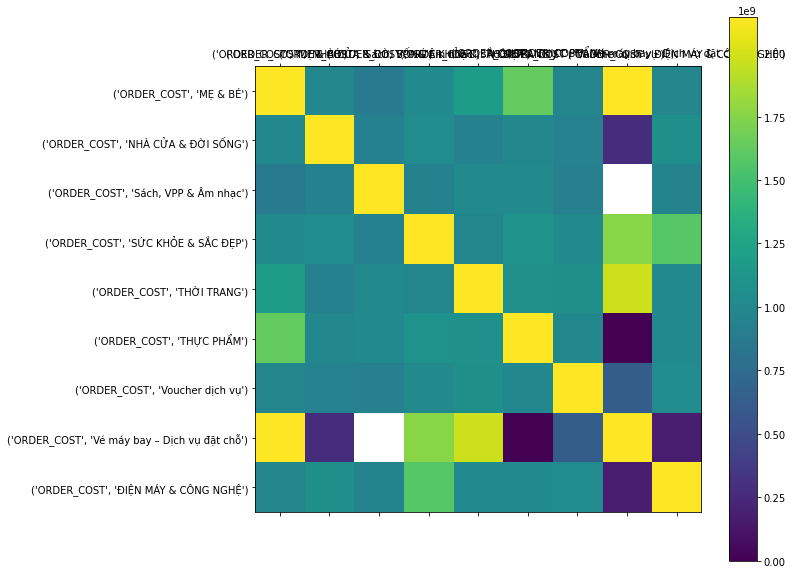

In [11]:
#plot corr
import matplotlib.pyplot as plt
%matplotlib inline


def plot_corr(df,size=10):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(dfSummary)
dfSummary.corr()

### Xây dựng chỉ số RFM

In [12]:
dataset.ORDER_DATE

0       2018-07-22 15:47:00
1       2018-08-05 20:21:29
2       2018-07-14 09:33:05
3       2018-07-14 06:59:24
4       2018-07-09 15:17:10
                ...        
41794   2018-08-11 11:21:36
41795   2018-07-18 07:08:06
41796   2018-07-10 13:16:37
41797   2018-08-11 15:19:47
41798   2018-07-06 12:36:42
Name: ORDER_DATE, Length: 41799, dtype: datetime64[ns]

In [13]:
from datetime import datetime

dfRecentOrder = pd.pivot_table(data = dataset, 
               index = ['CUST_ID'],
               values = ['ORDER_DATE'],
               aggfunc = {'ORDER_DATE':max}
              )

dfRecentOrder.columns = ['RecentOrderDate']
df = pd.merge(dataset, dfRecentOrder.reset_index(), on = ['CUST_ID'])
df['RecentOrderDate'] = df['RecentOrderDate'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
df['Recency'] = df['RecentOrderDate'].apply(lambda x: (datetime.now() - x).days)

In [14]:
dfFrequency = df.groupby('CUST_ID').ORDER_ID.nunique().to_frame()
dfFrequency.columns = ['Frequency']
df = pd.merge(df, dfFrequency.reset_index(), on = 'CUST_ID')

In [15]:
dfMonetary = df.groupby('CUST_ID').ORDER_COST.sum().to_frame()
dfMonetary.columns = ['Monetary']
df = pd.merge(df, dfMonetary.reset_index(), on = 'CUST_ID')

In [16]:
from scipy import stats
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df['Frequency'])[0]
df_customers_t['Monetary'] = pd.Series(np.cbrt(df['Monetary'])).values
df_customers_t.head(10)

,Recency,Frequency,Monetary
0,8.003559e+31,0.000000,274.925600
1,7.175059e+31,0.000000,36.840315
2,8.580907e+31,0.317180,103.446517
3,8.580907e+31,0.317180,103.446517
4,8.849395e+31,0.356746,124.481048
5,8.849395e+31,0.356746,124.481048
6,8.849395e+31,0.356746,124.481048
7,7.403468e+31,0.000000,70.000000
8,8.449446e+31,0.000000,332.620700
9,9.195687e+31,0.000000,57.798947


In [17]:
orderFrequencies = df['Frequency'].rank(method='first')
df['rFrequency'] = pd.qcut(orderFrequencies, 10, labels = False)
df[['rRecency', 'rMonetary']] = df[['Recency', 'Monetary']].apply(lambda x: pd.qcut(x, 10, labels = False))
df['rank'] = (df['rFrequency'] + df['rRecency'] + df['rMonetary'])/3
df['FinalRank'] = df['rank'].apply(int)
df['rank']

0        4.333333
1        0.333333
2        5.666667
3        5.666667
4        7.000000
           ...   
41794    3.333333
41795    4.666667
41796    6.000000
41797    4.666667
41798    4.666667
Name: rank, Length: 41799, dtype: float64

In [18]:
df['Segment'] = 'Low'
df.loc[(df['rank'] < 7) & (df['rank'] >= 4), 'Segment'] = 'Normal'
df.loc[df['rank'] >= 7, 'Segment'] = 'VIP'
df

,PRODUCT_CATE,PROVINCE,ORDER_COST,ORDER_DATE,ORDER_ID,CUST_ID,RecentOrderDate,Recency,Frequency,Monetary,rFrequency,rRecency,rMonetary,rank,FinalRank,Segment
0,ĐIỆN MÁY & CÔNG NGHỆ,Hồ Chí Minh,20780000.0,2018-07-22 15:47:00,KHA35965,CUS0000000,2018-07-22 15:47:00,1354,1,20780000.0,0,4,9,4.333333,4,Normal
1,ĐIỆN MÁY & CÔNG NGHỆ,Hà Nội,50000.0,2018-08-05 20:21:29,KHA04585,CUS0000001,2018-08-05 20:21:29,1340,1,50000.0,0,1,0,0.333333,0,Low
2,THỰC PHẨM,Hồ Chí Minh,955000.0,2018-07-14 09:33:05,KHA75581,CUS0000002,2018-07-14 09:33:05,1363,2,1107000.0,6,6,5,5.666667,5,Normal
3,SỨC KHỎE & SẮC ĐẸP,Hồ Chí Minh,152000.0,2018-07-14 06:59:24,KHA75580,CUS0000002,2018-07-14 09:33:05,1363,2,1107000.0,6,6,5,5.666667,5,Normal
4,THỰC PHẨM,Hà Nội,460162.0,2018-07-09 15:17:10,KHA62856,CUS0000003,2018-07-09 15:17:10,1367,3,1928900.0,8,7,6,7.000000,7,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41794,NHÀ CỬA & ĐỜI SỐNG,Hà Nội,869000.0,2018-08-11 11:21:36,KHA47841,CUS0034231,2018-08-11 11:21:36,1335,1,869000.0,6,0,4,3.333333,3,Low
41795,THỜI TRANG,Hà Nội,590000.0,2018-07-18 07:08:06,KHA62782,CUS0034232,2018-07-18 07:08:06,1359,1,590000.0,6,5,3,4.666667,4,Normal
41796,THỜI TRANG,Hà Nội,1405000.0,2018-07-10 13:16:37,KHA90136,CUS0034233,2018-07-10 13:16:37,1367,1,1405000.0,6,7,5,6.000000,6,Normal
41797,NHÀ CỬA & ĐỜI SỐNG,Hà Nội,1508000.0,2018-08-11 15:19:47,KHA28613,CUS0034234,2018-08-11 15:19:47,1334,2,2528590.0,8,0,6,4.666667,4,Normal


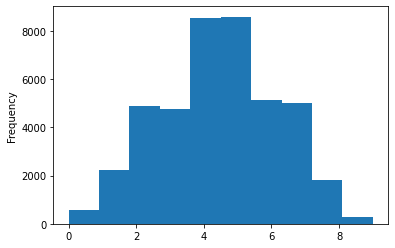

In [19]:
df['rank'].plot.hist(bins = 10)
plt.show()

Text(0.5, 1.0, 'Tỷ lệ số lượng khách hàng theo segment KH')

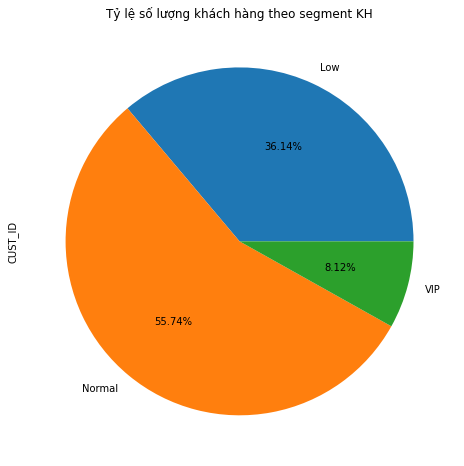

In [20]:
# df['rank'].plot.hist(bins = 10)
df.groupby('Segment').CUST_ID.count().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Tỷ lệ số lượng khách hàng theo segment KH')

Text(0.5, 1.0, 'Doanh số theo segment KH')

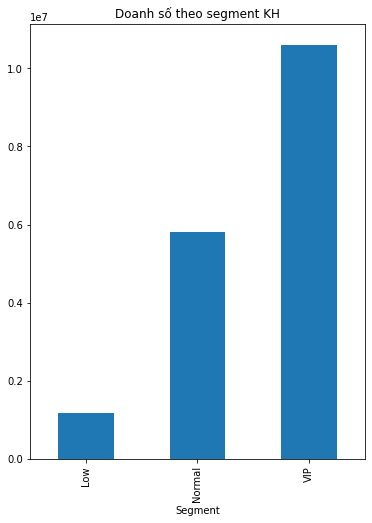

In [21]:
df.groupby('Segment').ORDER_COST.mean().plot.bar(figsize = (6, 8))
plt.title('Doanh số theo segment KH')

Text(0.5, 1.0, 'Tỷ lệ doanh số theo segment KH')

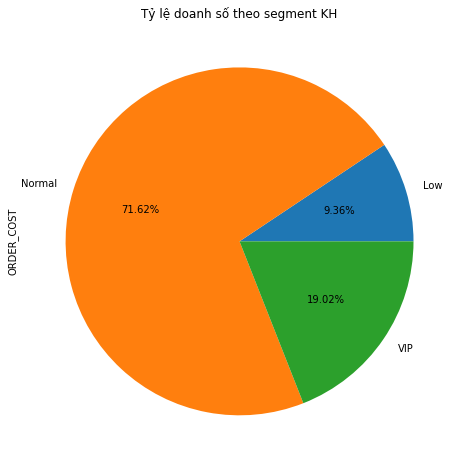

In [22]:
df.groupby('Segment').ORDER_COST.sum().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Tỷ lệ doanh số theo segment KH')

### Phân khúc khách hàng theo mô hình RFM sử dụng thuật toán Kmean

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)
df_customers_t

array([[-0.06457346, -0.65812476,  1.73640265],
       [-1.14856274, -0.65812476, -1.05087761],
       [ 0.69081556,  1.37936967, -0.27111437],
       ...,
       [ 1.04209966, -0.65812476, -0.17095578],
       [-1.58120718,  1.37936967,  0.11275767],
       [-1.58120718,  1.37936967,  0.11275767]])

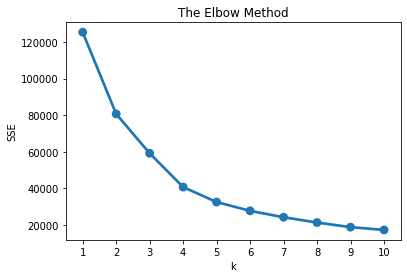

In [24]:
from sklearn.cluster import KMeans
import seaborn as sns

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [25]:
model = KMeans(n_clusters=4)
>>> model.fit(df_customers_t)
KMeans(n_clusters=4)


KMeans(n_clusters=4)

In [26]:
df['Cluster'] = model.labels_
df[['CUST_ID', 'Recency', 'Frequency','Monetary','Cluster']].head()


,CUST_ID,Recency,Frequency,Monetary,Cluster
0,CUS0000000,1354,1,20780000.0,3
1,CUS0000001,1340,1,50000.0,0
2,CUS0000002,1363,2,1107000.0,1
3,CUS0000002,1363,2,1107000.0,1
4,CUS0000003,1367,3,1928900.0,1


In [27]:
df.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2)


,Recency,Frequency,Monetary
Cluster,,,
0,1344.01,1.00,1533744.31
1,1351.24,2.71,3425969.18
2,1365.34,1.00,1730326.63
3,1353.40,1.80,55445751.45


### Phân cụm với từng chỉ số 

In [43]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Recency']])
df['RecencyCluster'] = kmeans.predict(df[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df = order_cluster('RecencyCluster', 'Recency',df,False)
df.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,9628.0,1369.979435,2.796627,1366.0,1368.0,1370.0,1372.0,1375.0
1,11045.0,1360.634676,2.712917,1356.0,1359.0,1361.0,1363.0,1365.0
2,10582.0,1349.918446,3.436499,1344.0,1347.0,1350.0,1353.0,1355.0
3,10544.0,1337.591901,3.132548,1333.0,1335.0,1337.0,1340.0,1343.0


In [45]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Frequency']])
df['FrequencyCluster'] = kmeans.predict(df[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',df,True)

#see details of each cluster
df.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,29108.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,4730.0,3.318816,0.466067,3.0,3.0,3.0,4.0,4.0
2,7004.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
3,957.0,5.641588,1.008367,5.0,5.0,5.0,6.0,10.0


In [46]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Monetary']])
df['MonetaryCluster'] = kmeans.predict(df[['Monetary']])


#order the cluster numbers
df = order_cluster('MonetaryCluster', 'Monetary',df,True)

#show details of the dataframe
df.groupby('MonetaryCluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,40588.0,3.350894e+06,6.236943e+06,0.000000e+00,3.600000e+05,1.000000e+06,3.010100e+06,4.320000e+07
1,1128.0,8.305198e+07,3.788261e+07,4.332690e+07,5.329300e+07,7.138900e+07,1.000858e+08,2.294500e+08
2,81.0,3.782149e+08,1.445872e+08,2.322800e+08,2.954600e+08,3.606190e+08,3.907930e+08,1.080000e+09
3,2.0,2.144066e+09,0.000000e+00,2.144066e+09,2.144066e+09,2.144066e+09,2.144066e+09,2.144066e+09


In [47]:
df[['CUST_ID', 'Recency', 'Frequency','Monetary', 'RecencyCluster', 'FrequencyCluster', 'MonetaryCluster']].head()

,CUST_ID,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster
0,CUS0000000,1354,1,20780000.0,2,0,0
1,CUS0000008,1347,1,230000.0,2,0,0
2,CUS0000011,1353,2,10481000.0,2,2,0
3,CUS0000011,1353,2,10481000.0,2,2,0
4,CUS0000016,1353,1,920000.0,2,0,0


In [48]:
#calculate overall score and use mean() to see details
df['OverallScore'] = df['RecencyCluster'] + df['FrequencyCluster'] + df['MonetaryCluster']
df.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()

C:\Users\Nghia\AppData\Local\Temp\ipykernel_7104\109396865.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()


,Recency,Frequency,Monetary
OverallScore,,,
0,1370.075792,1.000000,2.820024e+06
1,1361.531192,1.156425,4.425209e+06
2,1353.940360,1.389720,5.113174e+06
3,1344.233979,1.550175,6.114558e+06
4,1344.688818,2.640246,1.098594e+07
5,1339.309771,2.464449,1.108106e+07
6,1337.602020,5.032323,3.061728e+07
7,1336.830986,6.436620,1.623004e+08
8,1339.285714,7.142857,3.080998e+08


In [49]:
df['SegmentCust'] = 'Low-Value'
df.loc[df['OverallScore']>2,'SegmentCust'] = 'Mid-Value' 
df.loc[df['OverallScore']>4,'SegmentCust'] = 'High-Value'
df[['CUST_ID','SegmentCust']]

,CUST_ID,SegmentCust
0,CUS0000000,Low-Value
1,CUS0000008,Low-Value
2,CUS0000011,Mid-Value
3,CUS0000011,Mid-Value
4,CUS0000016,Low-Value
...,...,...
41794,CUS0031786,Low-Value
41795,CUS0033429,Low-Value
41796,CUS0033628,Low-Value
41797,CUS0006588,High-Value


In [34]:
cust = df[['CUST_ID','Recency','Frequency','Monetary','OverallScore']]
#cust


FM = df[['Monetary','Frequency','SegmentCust']]

In [35]:
df.groupby('SegmentCust')['CUST_ID'].count()

SegmentCust
High-Value     3109
Low-Value     24976
Mid-Value     13714
Name: CUST_ID, dtype: int64

Text(0.5, 1.0, 'Tỷ lệ số lượng khách hàng theo segment KH')

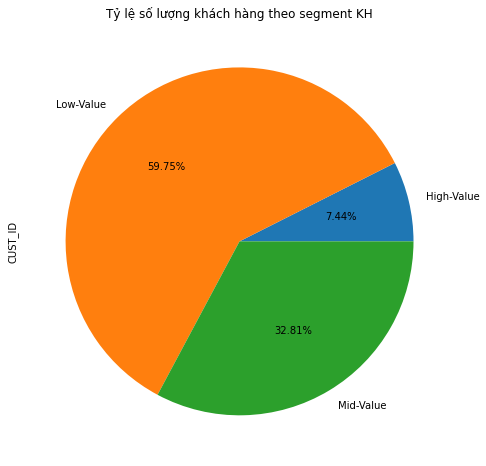

In [36]:
df.groupby('SegmentCust').CUST_ID.count().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Tỷ lệ số lượng khách hàng theo segment KH')

SegmentCust
High-Value    5.764223e+10
Low-Value     1.064578e+11
Mid-Value     1.005122e+11
Name: Monetary, dtype: float64


Text(0.5, 1.0, 'Tỷ lệ đóng góp vào doanh thu theo segment KH')

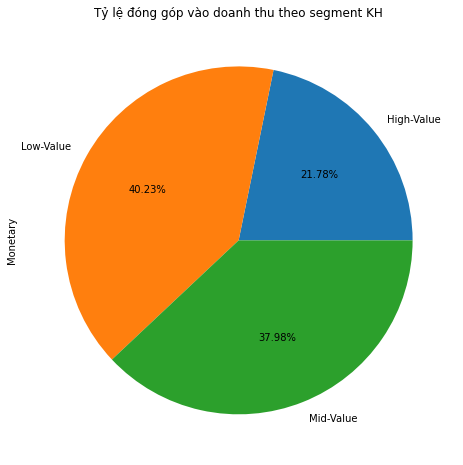

In [50]:
print(df.groupby('SegmentCust')['Monetary'].sum())
df.groupby('SegmentCust').Monetary.sum().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Tỷ lệ đóng góp vào doanh thu theo segment KH')

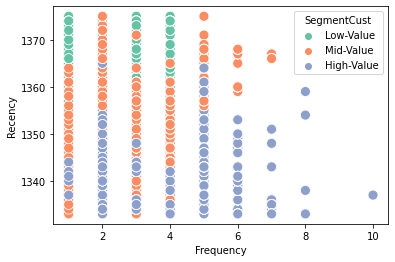

In [38]:
RF = df[['Recency','Frequency','SegmentCust']]
sns.scatterplot(data=RF, x="Frequency", y="Recency", hue="SegmentCust", s = 100, palette="Set2")
plt.show()

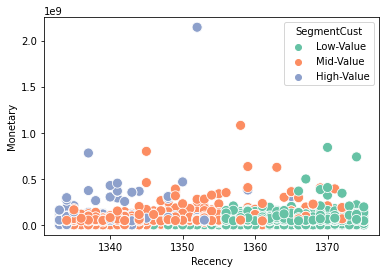

In [39]:
RM = df[['Monetary','Recency','SegmentCust']]
sns.scatterplot(data=RM, x="Recency", y="Monetary", hue="SegmentCust", s = 100, palette="Set2")
plt.show()

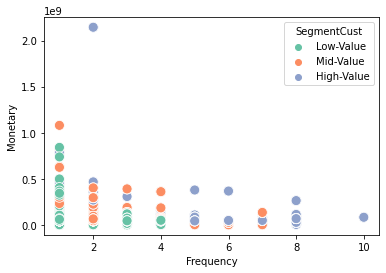

In [40]:
FM = df[['Monetary','Frequency','SegmentCust']]
sns.scatterplot(data=FM, x="Frequency", y="Monetary", hue="SegmentCust", s = 100, palette="Set2")
plt.show()